
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

In [15]:
import seaborn as sns

df = sns.load_dataset('mpg')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
# Since there are only six missing values in the 'horsepower' column, we can simply drop them.
df = df.dropna(subset=['horsepower'])
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino



&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

In [26]:
# Including model_year as a categorical variable
df_stats = df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]].describe()
df_stats

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


&nbsp; c) Make some plots on some of the columns that you find interesting.

c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


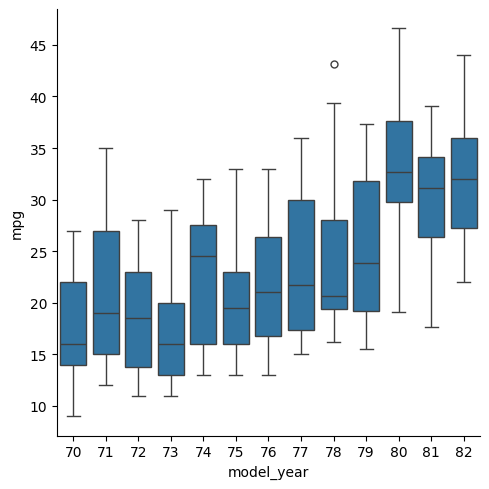

In [18]:
sns.catplot(x="model_year", y="mpg", data=df, kind="box")

<Axes: >

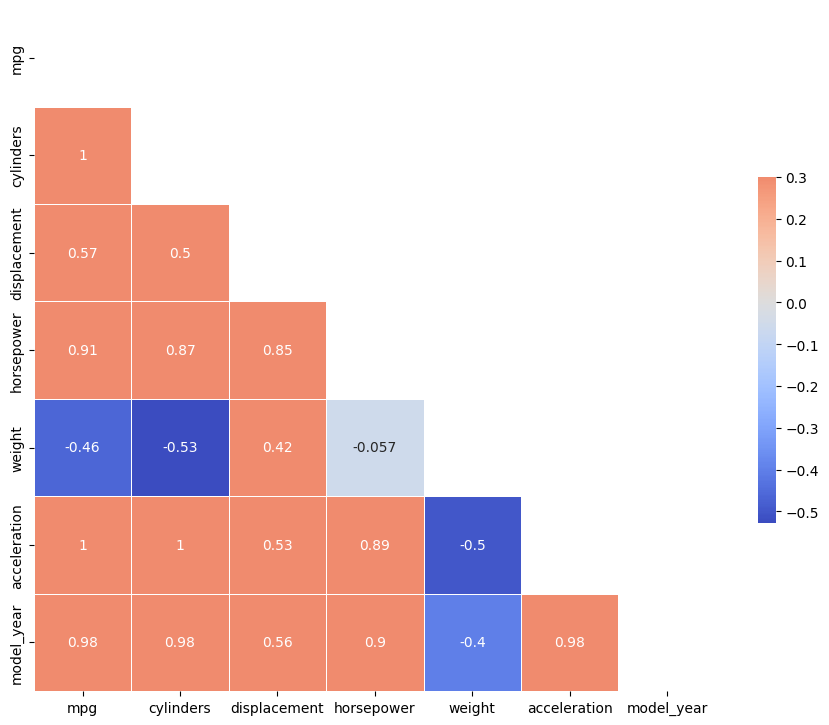

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_stats is your DataFrame
corr = df_stats.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<Axes: xlabel='model_year', ylabel='mpg'>

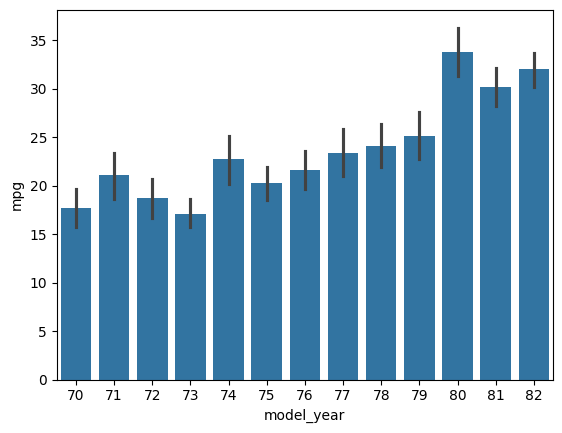

In [20]:
sns.barplot(x="model_year", y="mpg", data=df)


&nbsp; d) Check if there are any columns you might want to drop. 

In [21]:
# I think I already did this, origin and name.


<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
cleaned_df = df.drop(['origin', 'name'], axis=1)
X = cleaned_df.drop(['mpg'], axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, df.shape

((313, 6), (79, 6), (313,), (79,), (392, 9))


<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

In [23]:
def train_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    MAE = np.mean(np.abs(model.predict(X_test) - y_test))
    MSE = np.mean((model.predict(X_test) - y_test) ** 2)
    RMSE = np.sqrt(MSE)

    return train_score, test_score, MAE, MSE, RMSE

from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_score, test_score, MAE, MSE, RMSE = train_model(X_train, y_train, X_test, y_test, model)

print(f"Train score (R²): {train_score:.2f}")
print(f"Test score (R²): {test_score:.2f}")
print(f"Mean Absolute Error: {MAE:.2f}")
print(f"Mean Squared Error: {MSE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")


Train score (R²): 0.81
Test score (R²): 0.79
Mean Absolute Error: 2.50
Mean Squared Error: 10.50
Root Mean Squared Error: 3.24



<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

In [24]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Polynomial regression preprocessing of degree 1, 2 ,3
poly1 = PolynomialFeatures(degree=1)
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)

# Create the models
linRegModel = LinearRegression()
linRegModel_scaled = LinearRegression()
linRegModel_SGD = SGDRegressor(max_iter=1000, tol=1e-3)
poly1_model = LinearRegression()
poly2_model = LinearRegression()
poly3_model = LinearRegression()

results = {
    'Linear Regression': train_model(X_train, y_train, X_test, y_test, linRegModel),
    'Linear Regression Scaled': train_model(X_train_scaled, y_train, X_test_scaled, y_test, linRegModel_scaled),
    'Linear Regression SGD': train_model(X_train_scaled, y_train, X_test_scaled, y_test, linRegModel_SGD),
    'Polynomial Regression (degree 1)': train_model(poly1.fit_transform(X_train_scaled), y_train, poly1.fit_transform(X_test_scaled), y_test, poly1_model),
    'Polynomial Regression (degree 2)': train_model(poly2.fit_transform(X_train_scaled), y_train, poly2.fit_transform(X_test_scaled), y_test, poly2_model),
    'Polynomial Regression (degree 3)': train_model(poly3.fit_transform(X_train_scaled), y_train, poly3.fit_transform(X_test_scaled), y_test, poly3_model)
}

results_df = pd.DataFrame(results, index=['Train score (R²)', 'Test score (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']).T

best_model = results_df['Test score (R²)'].idxmax()
print(f"Best model: {best_model}, as evidenced below\n")
results_df.T.tail(3)

# Only poly 3 is slightly off, how come?

Best model: Polynomial Regression (degree 2), as evidenced below



,Linear Regression,Linear Regression Scaled,Linear Regression SGD,Polynomial Regression (degree 1),Polynomial Regression (degree 2),Polynomial Regression (degree 3)
Mean Absolute Error,2.503860,2.503860,2.525844,2.503860,1.980477,2.120725
Mean Squared Error,10.502370,10.502370,10.799012,10.502370,7.419858,10.443904
Root Mean Squared Error,3.240736,3.240736,3.286185,3.240736,2.723942,3.231703



<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

<Axes: >

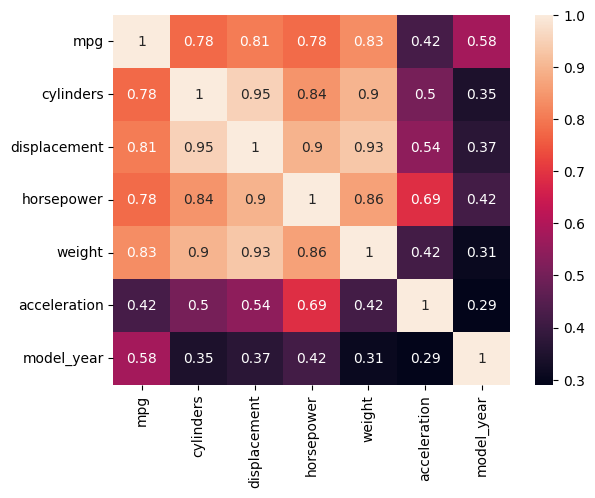

In [36]:
sns.heatmap(cleaned_df.corr().abs(), annot=True)

In [38]:
# Acceleration is not very higly correlated with mpg, but with horsepower, so we drop it.

cleaned_df = cleaned_df.drop("acceleration", axis=1)

KeyError: "['acceleration'] not found in axis"

<Axes: >

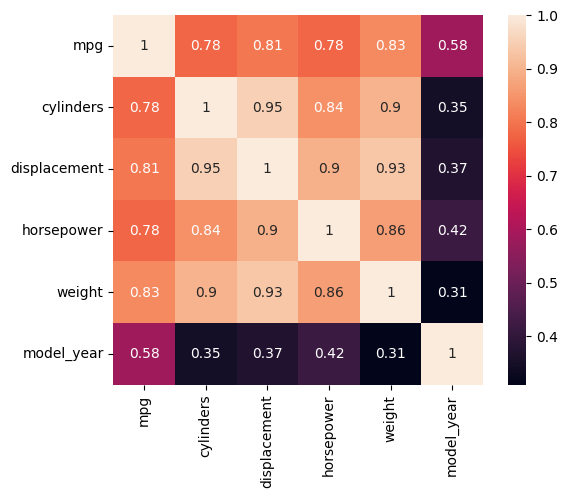

In [43]:
sns.heatmap(cleaned_df.corr().abs(), annot=True)

In [44]:
cleaned_df = cleaned_df.drop("cylinders", axis=1)

<Axes: >

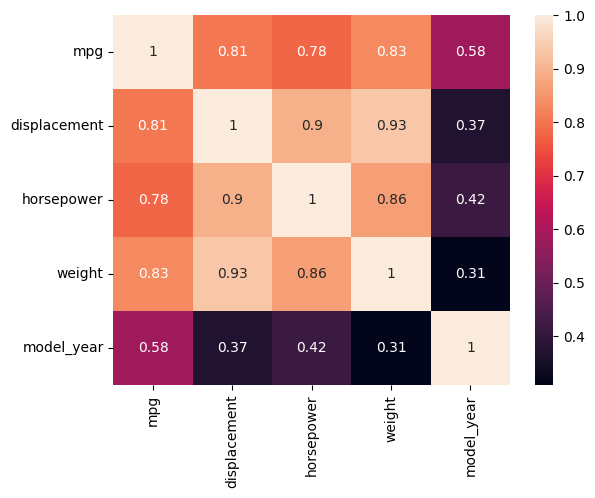

In [45]:
sns.heatmap(cleaned_df.corr().abs(), annot=True)

Now all features are highly correlated with mpg, except model_year, but since that is not very correlated to anything else we keep it. Well, ok, cylinders are highly correlated to displacement. As displacement is the most correlated feature with mpg, we drop cylinders.

Let's compare

In [47]:
# Splitting the data into train and test sets
X = cleaned_df.drop(['mpg'], axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, df.shape

((313, 4), (79, 4), (313,), (79,), (392, 9))

In [53]:
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {
    'Linear Regression': train_model(X_train, y_train, X_test, y_test, linRegModel),
    'Linear Regression Scaled': train_model(X_train_scaled, y_train, X_test_scaled, y_test, linRegModel_scaled),
    'Linear Regression SGD': train_model(X_train_scaled, y_train, X_test_scaled, y_test, linRegModel_SGD),
    'Polynomial Regression (degree 1)': train_model(poly1.fit_transform(X_train_scaled), y_train, poly1.fit_transform(X_test_scaled), y_test, poly1_model),
    'Polynomial Regression (degree 2)': train_model(poly2.fit_transform(X_train_scaled), y_train, poly2.fit_transform(X_test_scaled), y_test, poly2_model),
    'Polynomial Regression (degree 3)': train_model(poly3.fit_transform(X_train_scaled), y_train, poly3.fit_transform(X_test_scaled), y_test, poly3_model)
}

new_results_df = pd.DataFrame(results, index=['Train score (R²)', 'Test score (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']).T

best_model = new_results_df['Test score (R²)'].idxmax()
print(f"Best model: {best_model}, as evidenced below\n")
print("New results:")
new_results_df.T.tail(3)

Best model: Polynomial Regression (degree 3), as evidenced below

New results:


,Linear Regression,Linear Regression Scaled,Linear Regression SGD,Polynomial Regression (degree 1),Polynomial Regression (degree 2),Polynomial Regression (degree 3)
Mean Absolute Error,2.512341,2.512341,2.531349,2.512341,1.881535,1.876810
Mean Squared Error,10.638806,10.638806,10.820971,10.638806,6.771761,6.095557
Root Mean Squared Error,3.261718,3.261718,3.289524,3.261718,2.602261,2.468918


There's a slight decrease in R² score and the errors have increased to a small degree, except for third degree polynomials. 

In [54]:
print("Old results before cleaning")
results_df.T.tail(3)

Old results before cleaning


,Linear Regression,Linear Regression Scaled,Linear Regression SGD,Polynomial Regression (degree 1),Polynomial Regression (degree 2),Polynomial Regression (degree 3)
Mean Absolute Error,2.503860,2.503860,2.525844,2.503860,1.980477,2.120725
Mean Squared Error,10.502370,10.502370,10.799012,10.502370,7.419858,10.443904
Root Mean Squared Error,3.240736,3.240736,3.286185,3.240736,2.723942,3.231703


In [55]:
print("What has changed?")
new_results_df-results_df

What has changed?


,Train score (R²),Test score (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Linear Regression,-0.000239,-0.002673,0.008480,0.136436,0.020982
Linear Regression Scaled,-0.000239,-0.002673,0.008480,0.136436,0.020982
Linear Regression SGD,0.000500,-0.000430,0.005504,0.021959,0.003339
Polynomial Regression (degree 1),-0.000239,-0.002673,0.008480,0.136436,0.020982
Polynomial Regression (degree 2),-0.011897,0.012698,-0.098942,-0.648097,-0.121681
Polynomial Regression (degree 3),-0.043416,0.085194,-0.243916,-4.348347,-0.762785


It seems to be worth it, as the difference in accuracy is minimal, while the model is a lot less complex. The overfitting has decreased.

Finetuning further altering hyperparameters for a certain model.

In [ ]:
# Finetuning the hyperparameters for poly 3

# What hyperparameters are there that can be changed?

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---